In [1]:
import pandas as pd
import numpy as np
from scipy import stats
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("marketing_customer_analysis.csv", nrows=100)

In [3]:
# Standardize the names of columns
df.columns = [df.columns[i].lower().replace(' ', '_') for i in range(len(df.columns))]

In [4]:
# Describe DataFrame.
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000
mean,8032.561942,35858.080000,87.390000,15.010000,41.630000,0.5300,3.140000,421.262232
std,8088.008592,27850.908807,27.547533,9.625823,28.423441,1.0096,2.566371,219.294233
min,2294.478927,0.000000,61.000000,0.000000,0.000000,0.0000,1.000000,0.517753
25%,3790.223609,14001.250000,67.000000,7.000000,15.000000,0.0000,1.000000,307.184783
50%,5745.086542,32673.500000,76.000000,14.000000,42.000000,0.0000,2.000000,436.800000
75%,8211.972258,57742.250000,102.000000,21.250000,60.500000,1.0000,4.250000,528.000000
max,58166.553510,99845.000000,237.000000,35.000000,98.000000,5.0000,9.000000,1131.464935


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       100 non-null    object 
 1   state                          100 non-null    object 
 2   customer_lifetime_value        100 non-null    float64
 3   response                       100 non-null    object 
 4   coverage                       100 non-null    object 
 5   education                      100 non-null    object 
 6   effective_to_date              100 non-null    object 
 7   employmentstatus               100 non-null    object 
 8   gender                         100 non-null    object 
 9   income                         100 non-null    int64  
 10  location_code                  100 non-null    object 
 11  marital_status                 100 non-null    object 
 12  monthly_premium_auto           100 non-null    int6

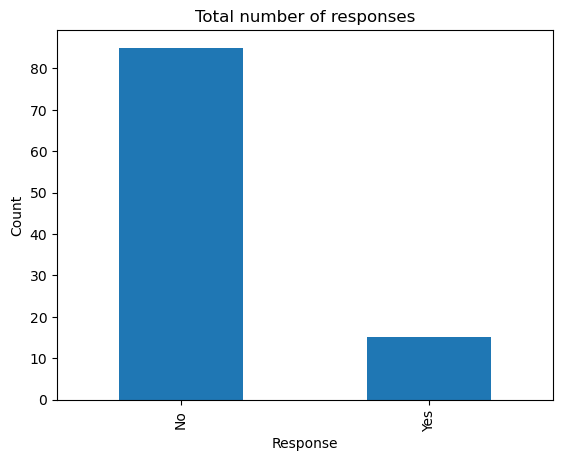

In [6]:
# Show a plot of the total number of responses.
total_resp = df["response"].value_counts()
total_resp.plot.bar()

plt.xlabel("Response")
plt.ylabel("Count")
plt.title("Total number of responses")
plt.show()

<AxesSubplot:title={'center':'Total number of responses'}>

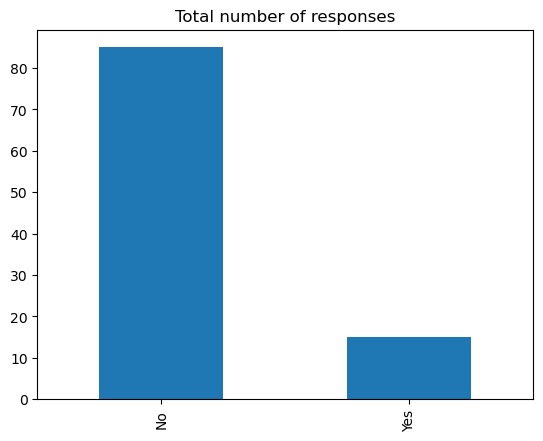

In [7]:
# Show a plot of the total number of responses.
# The shortest line
df["response"].value_counts().plot.bar(x="Response", y="Count", title="Total number of responses")


In [39]:
df2 = df.groupby(['sales_channel','response']).size()
df2

sales_channel  response
Agent          No          31
               Yes          7
Branch         No          25
               Yes          3
Call Center    No          22
               Yes          3
Web            No           7
               Yes          2
dtype: int64

In [40]:
df2 = df2.unstack()
df2

response,No,Yes
sales_channel,,
Agent,31,7
Branch,25,3
Call Center,22,3
Web,7,2


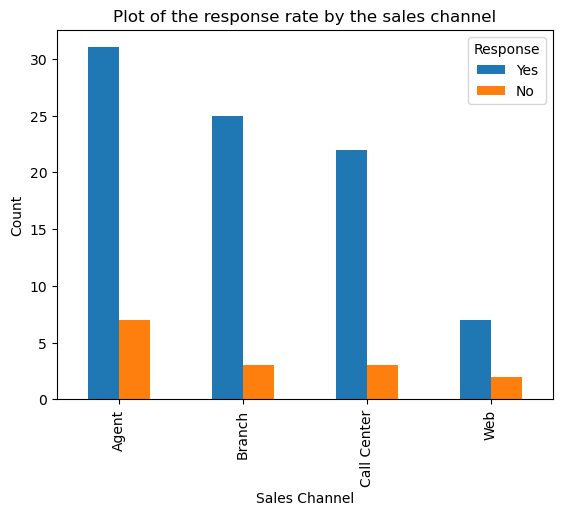

In [49]:
df2.plot(kind='bar', title="Plot of the response rate by the sales channel")
plt.xlabel("Sales Channel")
plt.ylabel("Count")
plt.legend(["Yes", "No"], title="Response")
plt.show()

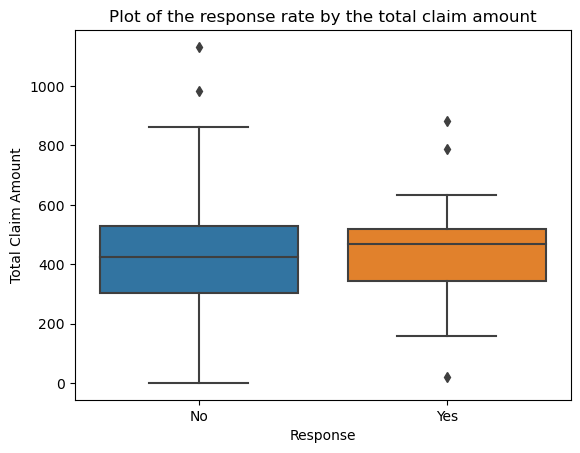

In [62]:
# Show a plot of the response rate by the total claim amount.
# For categorical variables
sns.boxplot(x='response', y='total_claim_amount', data = df)
plt.xlabel("Response")
plt.ylabel("Total Claim Amount")
plt.title("Plot of the response rate by the total claim amount")
plt.show()

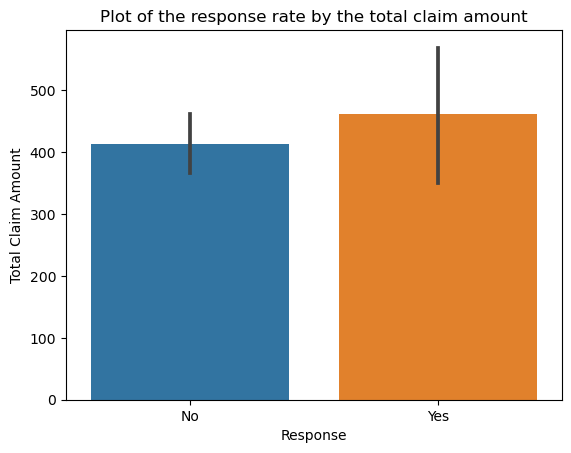

In [61]:
# Show a plot of the response rate by the total claim amount.
# For categorical variables
sns.barplot(x='response', y='total_claim_amount', data = df)
plt.xlabel("Response")
plt.ylabel("Total Claim Amount")
plt.title("Plot of the response rate by the total claim amount")
plt.show()

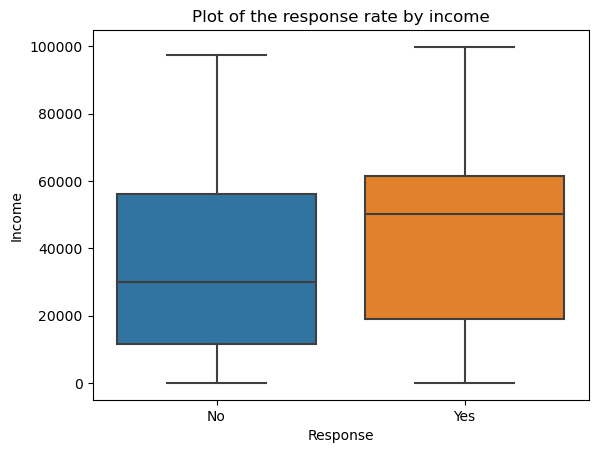

In [64]:
# Show a plot of the response rate by income.
sns.boxplot(x='response', y='income', data = df)
plt.xlabel("Response")
plt.ylabel("Income")
plt.title("Plot of the response rate by income")
plt.show()